# Airline Passenger Satisfaction Analysis

![Dataset Cover](dataset-cover.jpg)

## Overview
This project analyzes airline passenger satisfaction using data-driven insights and visualizations.


## Abstract

This project analyzes customer satisfaction scores from over 120,000 airline passengers.

The dataset includes features such as:
- **Passenger Demographics**: Gender, Age, Customer Type, etc.
- **Travel Details**: Class, Flight Distance, Departure/Arrival delays, etc.
- **Service Ratings**: In-flight services, seat comfort, cleanliness, etc.

The goal is to identify key drivers of passenger satisfaction and provide actionable insights to improve airline services.

The rapid growth of the aviation industry and increasing competition among airlines have made customer satisfaction a critical factor for success. While previous studies have focused on operational efficiency and cost reduction, there is a significant gap in understanding the factors that influence passenger satisfaction from a service quality perspective. This study fills that gap by leveraging advanced data analysis techniques to uncover patterns and trends in passenger feedback.

## Libraries

In [80]:
#libraries for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
#split
from sklearn.model_selection import train_test_split
#score
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import phik

import warnings
warnings.filterwarnings('ignore')

# Configure visualization
plt.style.use('seaborn')
sns.set_theme(context='notebook', style='whitegrid', palette='husl')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
COLOR_PALETTE = ["#3d85c6", "#dc1e1e", "#909195"]

## Reading Data

In [81]:
df =pd.read_csv("Data/airline_passenger_satisfaction.csv", encoding = "utf-8" , sep = ",")

In [82]:
df.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [83]:
# Display basic information about the dataset

print("Dataset Shape:", df.shape)
print ("\n**********************************")
print("\nDataset Info:")
print(df.info())

Dataset Shape: (129880, 24)

**********************************

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenie

In [84]:
#describe the data this gives us some general information on the dataset
#it shows us the count of each value, the mean of each value, standard deviation, percentiles and min/max value syle
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [87]:
# see quick info of category values 

df.describe(include = object)

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


## Data Cleaning

In [88]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Gender:
Female    65899
Male      63981
Name: Gender, dtype: int64

Unique values in Customer Type:
Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

Unique values in Type of Travel:
Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

Unique values in Class:
Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

Unique values in Satisfaction:
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64


In [89]:
# Check for missing values
missing_summary = df.isnull().sum()
print("\nMissing Values Summary:\n", missing_summary)


Missing Values Summary:
 ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-fligh

> #### We have a one feature that have missing values (Arrival Delay)
> **The ‘arrival delay in minutes’ has some null values that is 393 (0.3%)**

In [14]:
# Fill numerical missing values with median
df.fillna(df.median(), inplace=True)

In [15]:
# Check for missing values after fill nissing value

missing_summary = df.isnull().sum()
print("\nMissing Values Summary:\n", missing_summary)


Missing Values Summary:
 ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggag

In [16]:
# check if duplicated in data

df.duplicated().sum()

0

> ##### We have no duplicates

In [17]:
#drop useless columns and delete the rowsthat all values nan values

df.drop(["ID"],axis=1,inplace=True)
df.dropna(axis=0, how="all", subset=df.columns[1:], inplace=True)

### Handle outliers 

> #### Outlier detection is crucial for ensuring the model operates correctly during its installation.

<Figure size 1400x1400 with 0 Axes>

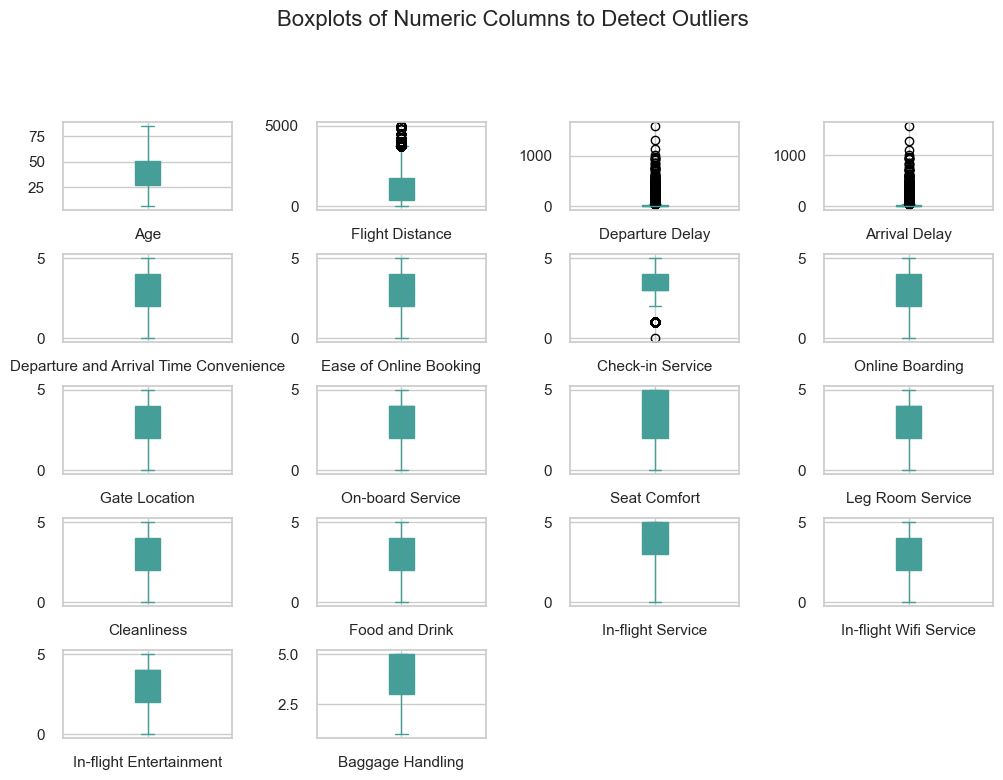

In [18]:
# Select only numeric columns
numeric_data=df.select_dtypes(exclude=["category"])
# Plot boxplots for numeric columns to check for outliers
plt.figure(figsize=(14, 14))
numeric_data.plot(subplots=True, kind="box", layout=(5, 4), patch_artist=True, color="#459E97")
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots
plt.suptitle("Boxplots of Numeric Columns to Detect Outliers", fontsize=16, y=1.02)
plt.show()

##### as we see that we have skewness and outlairs lets analyisse the origin of these outalirs 

In [19]:
# Function to handle outliers using IQR method

"""
This function take the name of column and compute the median(Q2)represent 50% percentage 
and also compute the Q3(75%)from the boxblot then compute the inter_quantile_range 
and then we compute the upper limit and the lowerlimit to show the origin of the outlairs
    
"""
def out_lairs(col):

    Q1 = df[col].quantile(0.25)   # First quartile (25th percentile)
    Q3 =  df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    data_out = df.loc[(df[col] < (Q1-1.5*IQR)) | (df[col] > (Q3+1.5*IQR))][:10]
    
    return data_out 

In [20]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


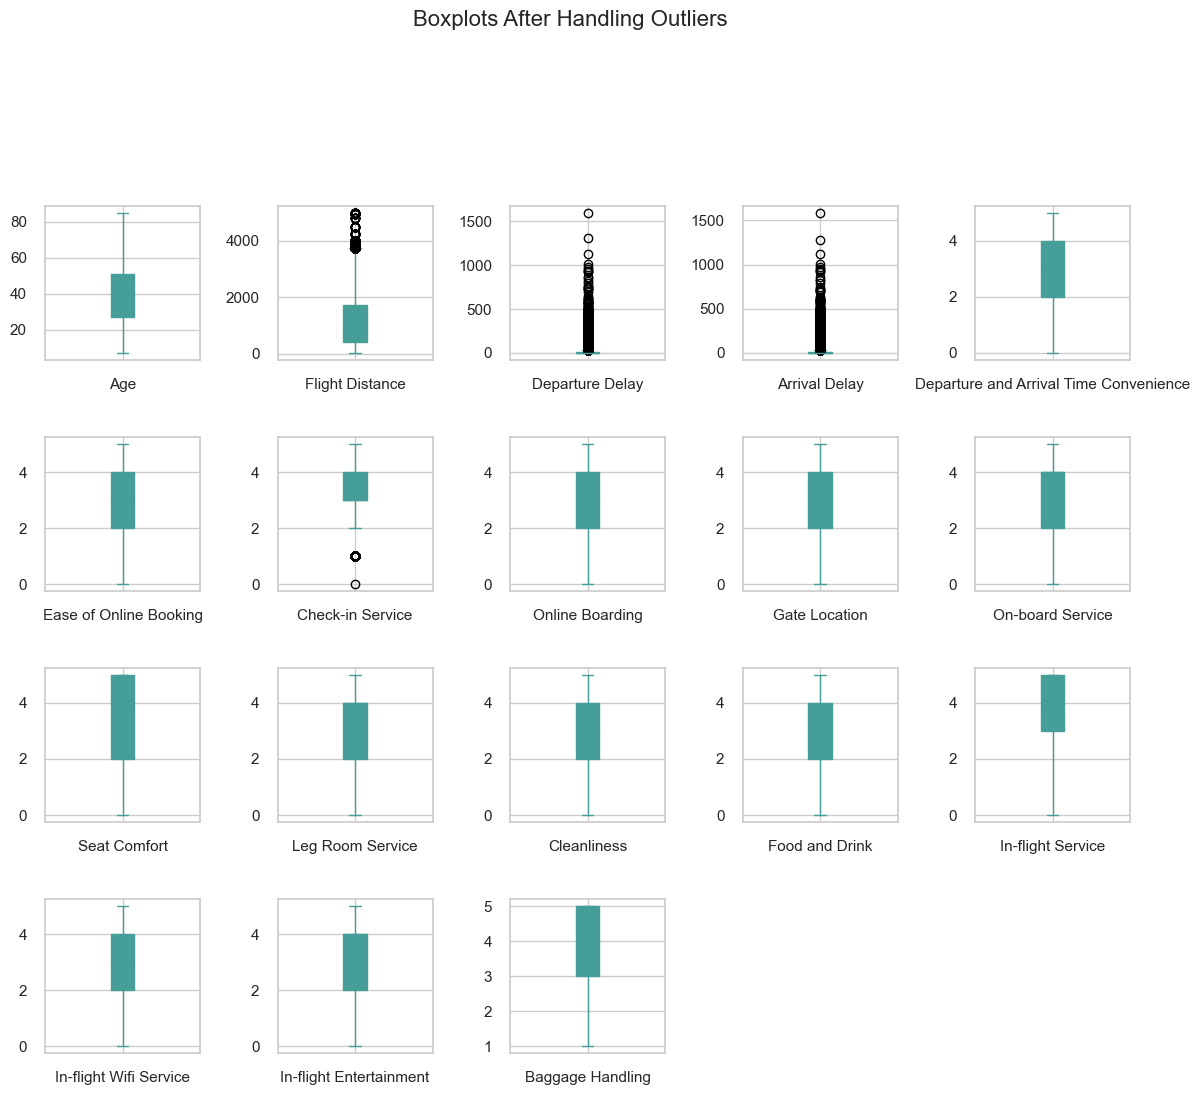

In [21]:
numeric_data = df.select_dtypes(include=["int64", "float64"])
numeric_data.plot(subplots=True, kind="box", layout=(5, 5), figsize=(14, 14), patch_artist=True, color="#459E97")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("Boxplots After Handling Outliers", fontsize=16, y=1.02)
plt.show()

In [22]:
out_lairs("Flight Distance")

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
5,Male,43,Returning,Business,Business,3788,0,0.0,4,4,...,4,4,4,3,3,4,4,4,4,Satisfied
58,Female,41,Returning,Business,Business,3997,1,0.0,1,1,...,4,5,4,4,4,4,1,4,5,Satisfied
148,Male,37,Returning,Business,Business,3758,41,50.0,3,3,...,2,2,2,1,4,2,2,2,2,Neutral or Dissatisfied
173,Female,39,Returning,Business,Business,3822,6,9.0,4,3,...,3,4,3,2,1,3,3,3,3,Neutral or Dissatisfied
185,Male,42,Returning,Business,Business,3880,0,0.0,1,1,...,3,4,4,3,3,3,1,3,5,Satisfied
198,Female,60,Returning,Business,Business,3756,36,24.0,4,4,...,4,5,4,5,2,4,4,4,4,Satisfied
254,Male,26,Returning,Business,Business,3800,158,213.0,4,4,...,5,3,5,3,3,4,4,3,5,Satisfied
263,Female,43,Returning,Business,Business,3967,1,0.0,5,5,...,5,4,5,3,3,5,5,5,5,Satisfied
325,Female,31,Returning,Business,Business,3845,0,0.0,1,1,...,5,5,4,5,5,4,1,5,4,Satisfied
328,Male,47,Returning,Business,Business,3954,9,0.0,3,3,...,1,3,1,3,1,1,1,1,1,Neutral or Dissatisfied


In [23]:
out_lairs("Departure Delay")

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
13,Male,9,Returning,Personal,Business,853,68,76.0,5,1,...,4,5,3,5,5,5,1,5,4,Neutral or Dissatisfied
40,Female,54,Returning,Business,Business,1554,59,70.0,2,2,...,4,4,4,5,2,4,2,4,4,Satisfied
54,Male,36,Returning,Business,Business,3655,40,71.0,1,1,...,3,3,3,2,1,3,1,3,1,Neutral or Dissatisfied
61,Male,31,Returning,Business,Economy,173,151,186.0,5,5,...,4,2,3,2,2,3,2,1,4,Neutral or Dissatisfied
69,Female,49,Returning,Business,Business,3213,68,59.0,3,3,...,1,4,1,3,3,1,4,1,4,Neutral or Dissatisfied
76,Female,72,First-time,Business,Economy,67,324,296.0,3,3,...,4,2,4,2,3,2,3,3,3,Neutral or Dissatisfied
78,Female,70,Returning,Personal,Economy,108,50,41.0,4,0,...,3,4,0,5,4,3,5,3,3,Satisfied
79,Female,46,Returning,Personal,Economy,173,45,29.0,1,1,...,5,4,1,3,1,5,1,5,5,Neutral or Dissatisfied
82,Male,58,Returning,Personal,Economy,215,254,254.0,2,2,...,2,4,3,4,2,3,2,3,4,Neutral or Dissatisfied
89,Male,41,Returning,Business,Business,2865,72,78.0,2,4,...,5,4,5,3,3,5,2,5,5,Satisfied


In [24]:
out_lairs("Arrival Delay")

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
13,Male,9,Returning,Personal,Business,853,68,76.0,5,1,...,4,5,3,5,5,5,1,5,4,Neutral or Dissatisfied
28,Male,40,Returning,Business,Business,3734,0,52.0,4,4,...,5,4,5,3,2,5,4,5,5,Satisfied
40,Female,54,Returning,Business,Business,1554,59,70.0,2,2,...,4,4,4,5,2,4,2,4,4,Satisfied
47,Female,40,First-time,Business,Business,212,29,41.0,3,3,...,1,4,2,5,5,2,3,5,3,Neutral or Dissatisfied
54,Male,36,Returning,Business,Business,3655,40,71.0,1,1,...,3,3,3,2,1,3,1,3,1,Neutral or Dissatisfied
59,Male,57,Returning,Business,Business,3392,19,34.0,1,1,...,4,5,4,5,5,4,1,4,5,Satisfied
61,Male,31,Returning,Business,Economy,173,151,186.0,5,5,...,4,2,3,2,2,3,2,1,4,Neutral or Dissatisfied
68,Male,52,Returning,Business,Business,212,0,67.0,1,3,...,1,3,1,4,4,1,3,1,3,Neutral or Dissatisfied
69,Female,49,Returning,Business,Business,3213,68,59.0,3,3,...,1,4,1,3,3,1,4,1,4,Neutral or Dissatisfied


In [25]:
#cuz of skewing  and outlairs we are gonna impute with median

df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].median())

> **Handling the types of features**

In [26]:
#lets convert it into ordinal variables
explain_df=["Ease of Online Booking","Check-in Service" ,"Online Boarding","Gate Location" ,"Leg Room Service","Cleanliness","Food and Drink" ,"In-flight Service" ,"In-flight Wifi Service" ,"In-flight Entertainment" ,"Baggage Handling","Seat Comfort","On-board Service","Departure and Arrival Time Convenience"]
for i in explain_df:
    df[i]=df[i].astype(object)

In [27]:
unique_values = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

Gender : ['Male', 'Female']
Customer Type : ['First-time', 'Returning']
Type of Travel : ['Business', 'Personal']
Class : ['Business', 'Economy', 'Economy Plus']
Departure and Arrival Time Convenience : [3, 2, 4, 1, 5, 0]
Ease of Online Booking : [3, 2, 4, 1, 5, 0]
Check-in Service : [4, 3, 1, 2, 5, 0]
Online Boarding : [3, 5, 4, 2, 1, 0]
Gate Location : [3, 2, 4, 1, 5, 0]
On-board Service : [3, 5, 4, 2, 1, 0]
Seat Comfort : [5, 4, 3, 2, 1, 0]
Leg Room Service : [2, 5, 3, 4, 1, 0]
Cleanliness : [5, 4, 3, 2, 1, 0]
Food and Drink : [5, 3, 4, 2, 1, 0]
In-flight Service : [5, 3, 4, 1, 2, 0]
In-flight Wifi Service : [3, 2, 4, 1, 0, 5]
In-flight Entertainment : [5, 3, 4, 2, 1, 0]
Baggage Handling : [5, 3, 4, 1, 2]
Satisfaction : ['Neutral or Dissatisfied', 'Satisfied']


In [28]:
numeric_values = {column for column in df.select_dtypes(int).columns}
numeric_values=list(numeric_values)
numeric_values

['Departure Delay', 'Age', 'Flight Distance']

## EDA (Exploratory Data Analysis)

In [29]:
# create function to visualized categorical column

def count_plot(column_name):
    graph = sns.countplot(x = column_name, data = df, order = df[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    
    plt.show()

> **Gender**

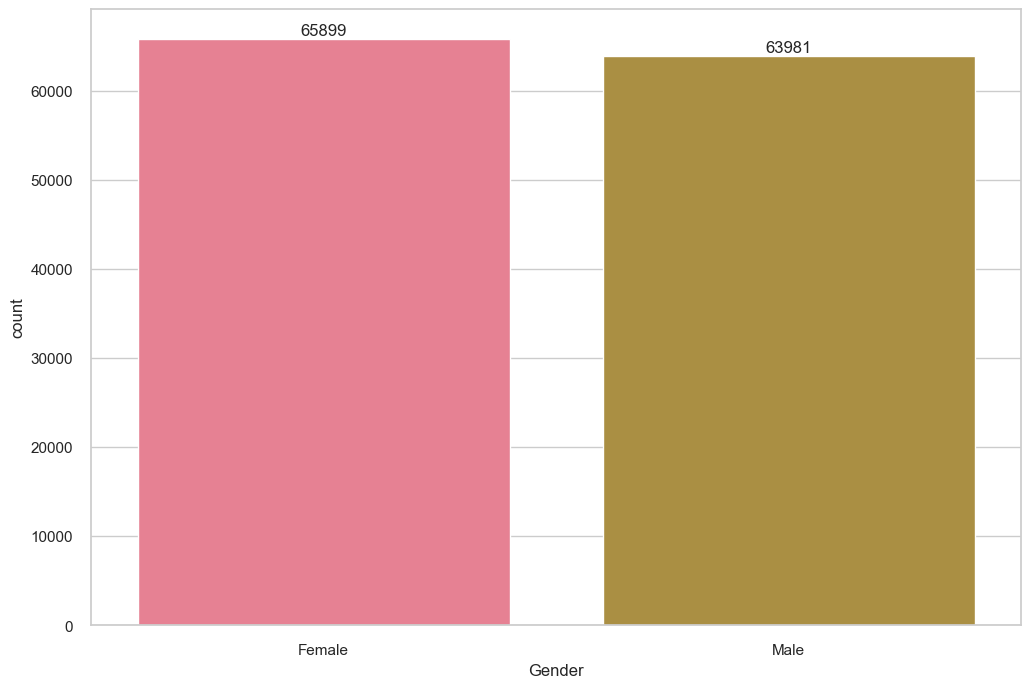

In [30]:
# visualized column 

count_plot("Gender")

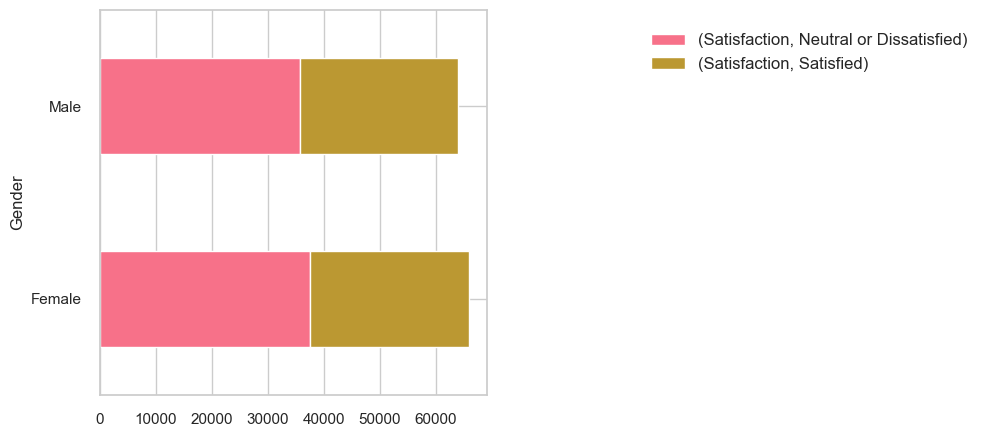

In [31]:
pd.DataFrame(df.groupby('Gender')['Satisfaction'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(2.3, 1), loc='upper right', borderaxespad=1, fontsize=12)
plt.show()

- **Gender seemed to be Equal in data.**

> **Age**

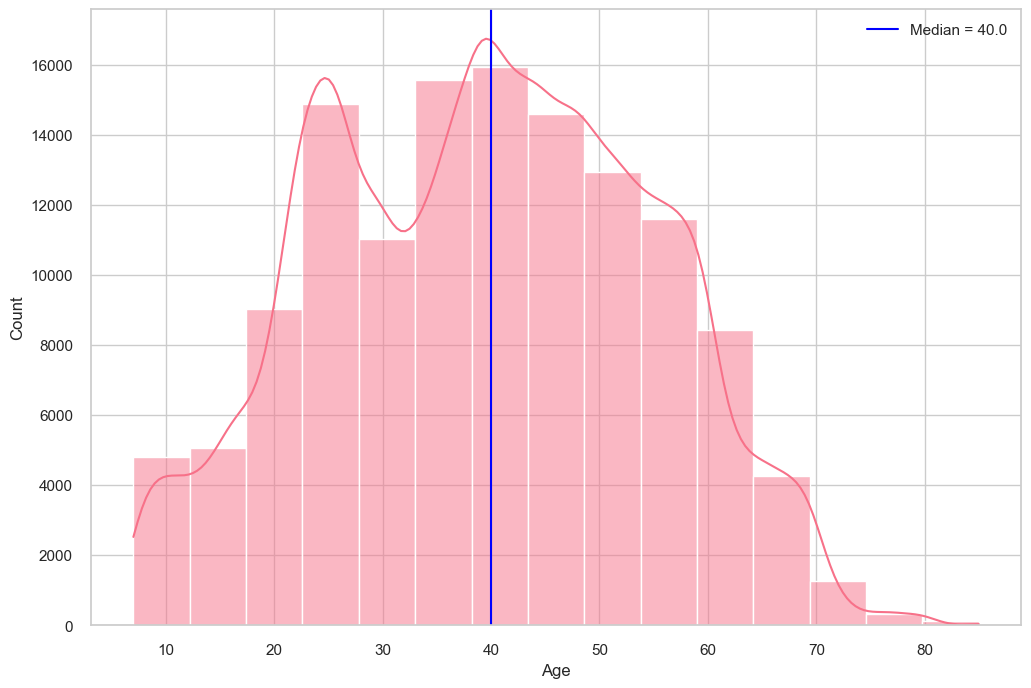

In [32]:
# Age Distribution

sns.histplot(x = "Age", data = df, kde = True, bins = 15)
plt.axvline(df.Age.median(), label = f'Median = {df.Age.median()}', color = 'b')
plt.legend()
plt.show()

#### **We can see**
- **Ages has Normal ditribution**
-  **Average Ages is 40 years old**

> **Customer Type**
- **Q1: Which customer segments are most valuable and satisfied?**

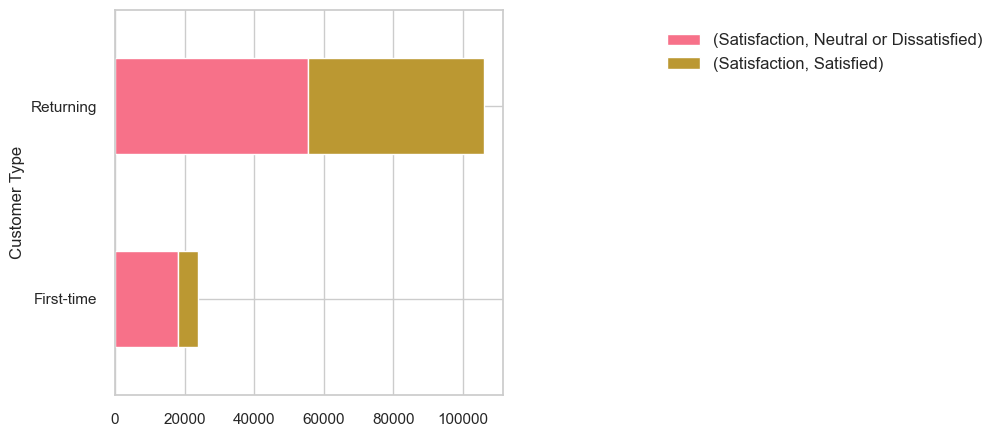

In [33]:
pd.DataFrame(df.groupby('Customer Type')['Satisfaction'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(2.3, 1), loc='upper right', borderaxespad=1, fontsize=12)
plt.show()

- **Most Passengers are Returning, so they have experienced the services before.**

> **Type of Travel**

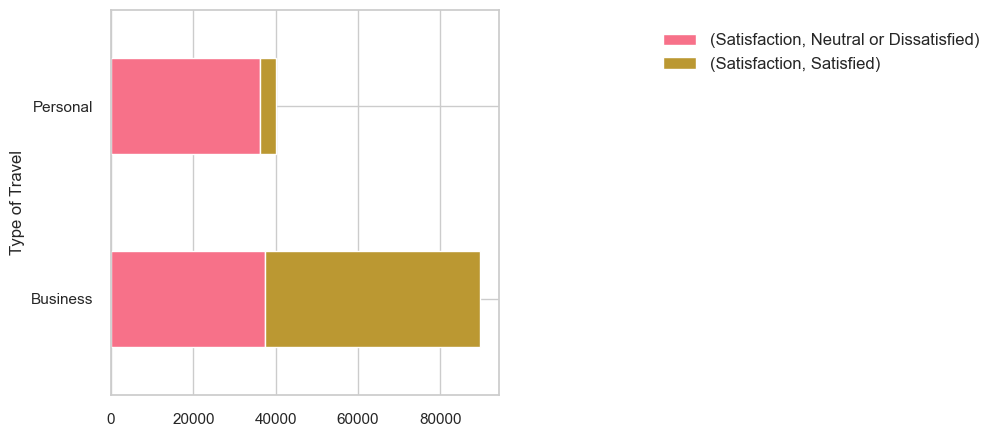

In [34]:
pd.DataFrame(df.groupby('Type of Travel')['Satisfaction'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(2.3, 1), loc='upper right', borderaxespad=1, fontsize=12)
plt.show()

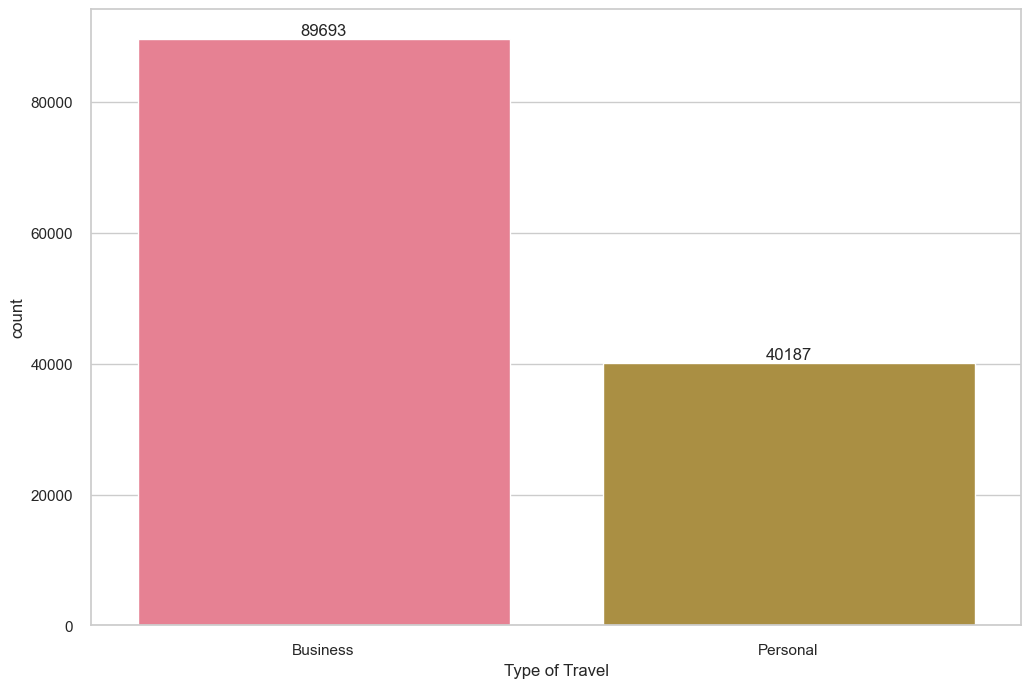

In [35]:
# visualized column 

count_plot("Type of Travel")

- **Most common Type of Travel is Business.**

In [36]:
# see unique value

df["Class"].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

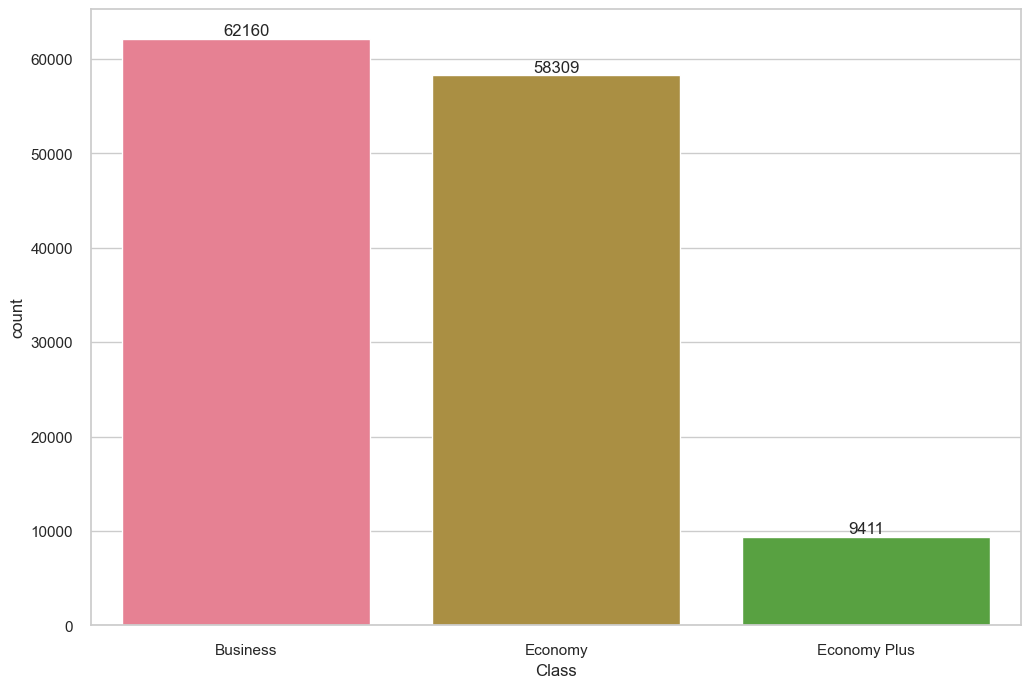

In [37]:
# visualized column 

count_plot("Class")

- **Most passengers in Business Class but fewer of them in Economy Plus.**

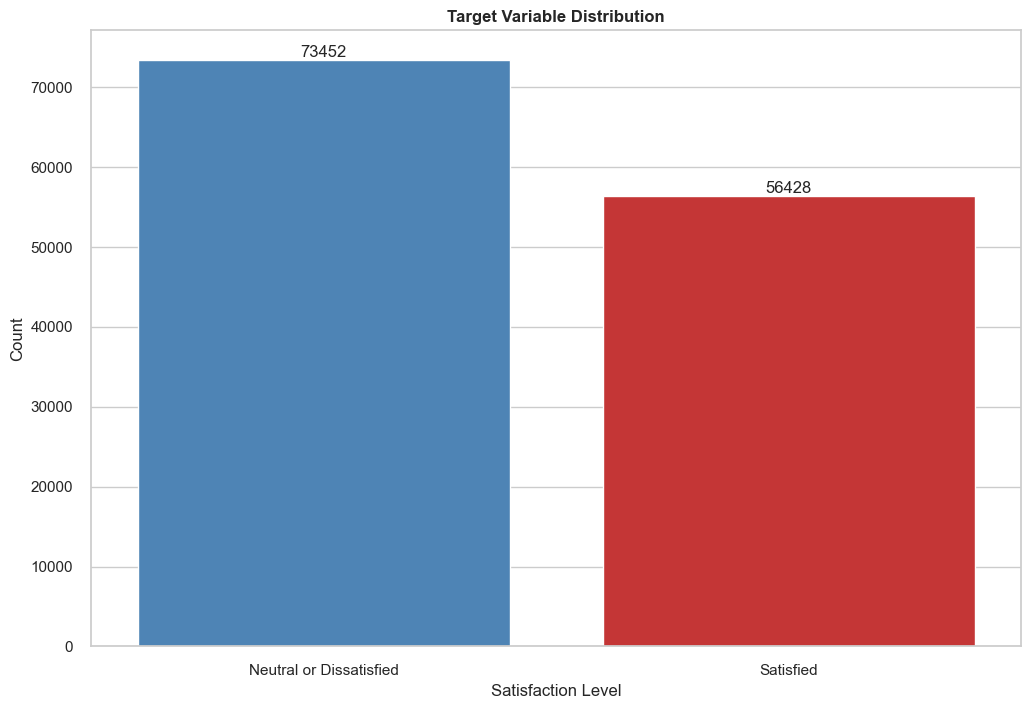

In [38]:
# Target distribution
ax = sns.countplot(data=df, x='Satisfaction', palette=COLOR_PALETTE[:2])
plt.title('Target Variable Distribution', fontweight='bold')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.show()

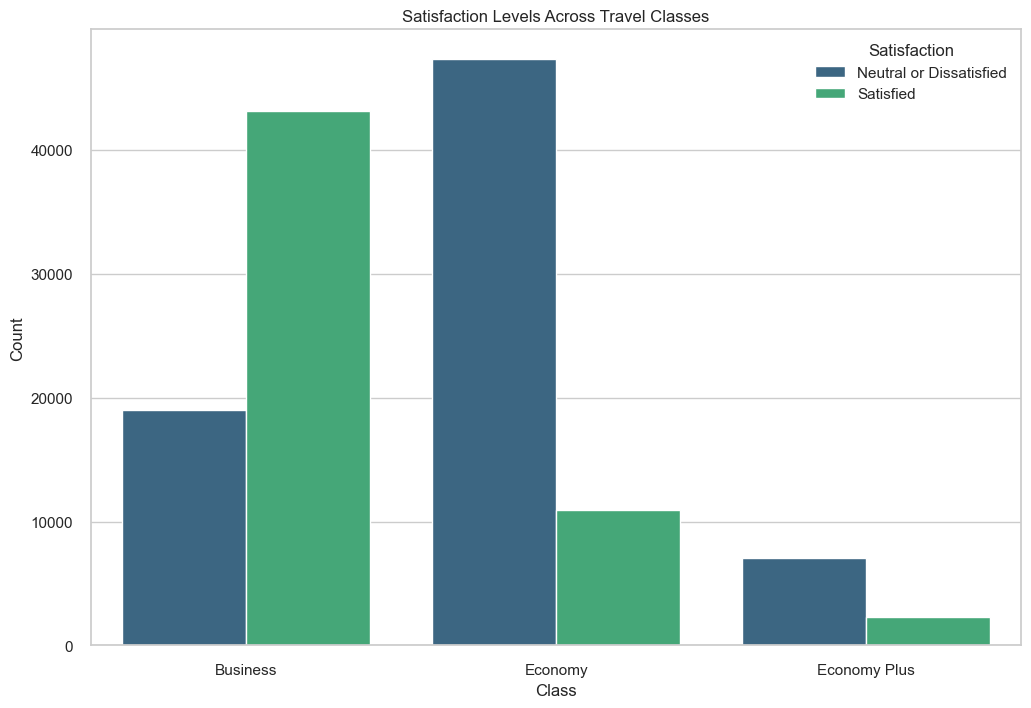

In [39]:
# Satisfaction by Class
sns.countplot(data=df, x='Class', hue='Satisfaction', palette='viridis')
plt.title('Satisfaction Levels Across Travel Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- **Majority of Passengers Neutral or Dissatisfied.**

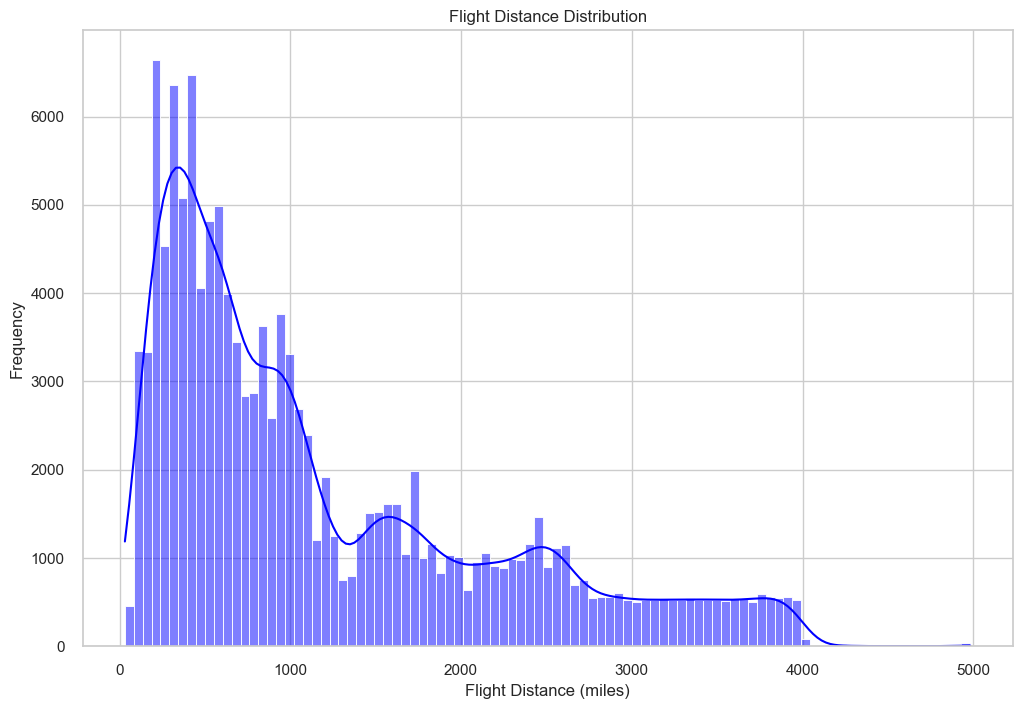

In [40]:
# Flight Distance Distribution

sns.histplot(df['Flight Distance'], kde=True, color='b')
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Frequency')
plt.show()

- **The numbers are normal in relation to the distance between some countries.**

- **Majority of Flights are under 1000 km.**

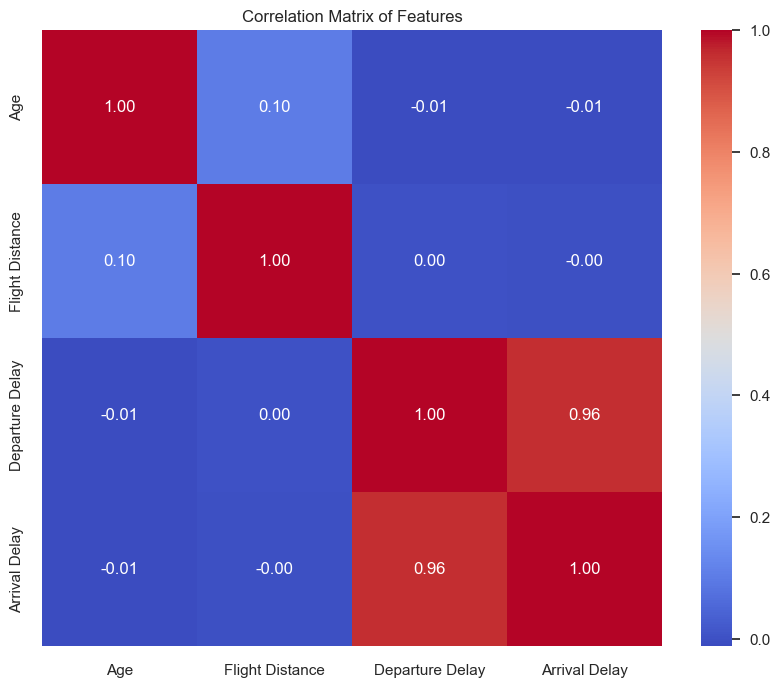

In [41]:
# 3. Correlation Analysis
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [42]:
service_columns = [
        'Departure and Arrival Time Convenience', 'Ease of Online Booking',
        'Check-in Service', 'Online Boarding', 'Gate Location',
        'On-board Service', 'Seat Comfort', 'Leg Room Service',
        'Cleanliness', 'Food and Drink', 'In-flight Service',
        'In-flight Wifi Service', 'In-flight Entertainment',
        'Baggage Handling'
]

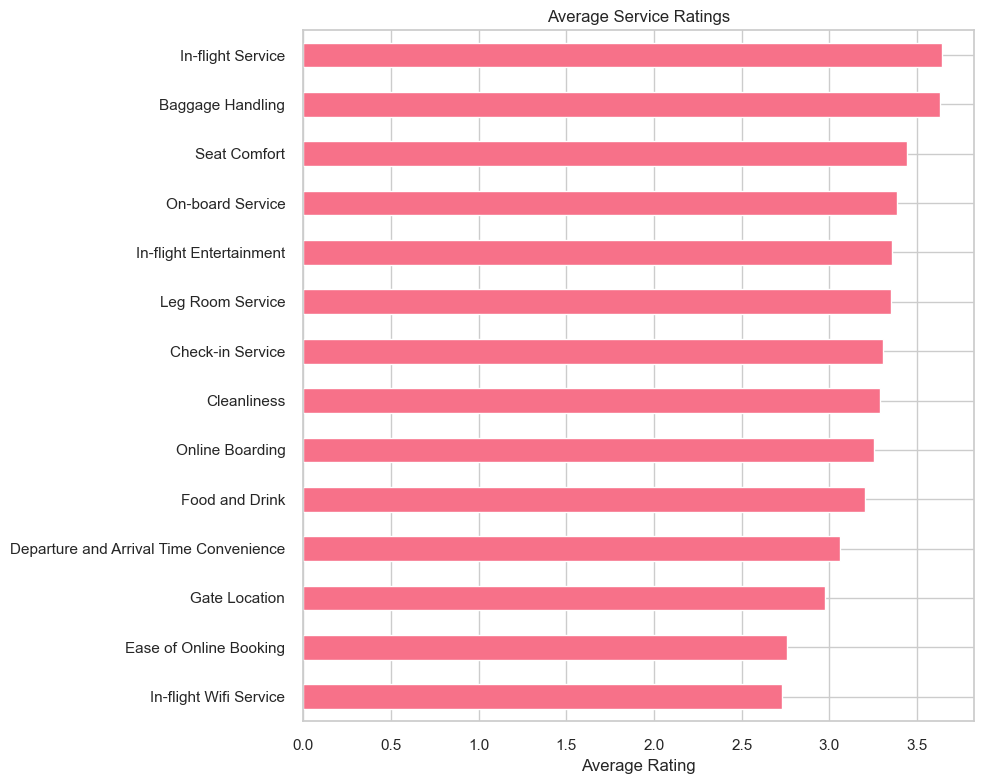

In [43]:
avg_ratings = df[service_columns].mean().sort_values(ascending=True)
    
plt.figure(figsize=(10, 8))
avg_ratings.plot(kind='barh')
plt.title('Average Service Ratings')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()
    

In [44]:
# Age Group Analysis
df['Age_Group'] = pd.cut(df['Age'],
                         
                        bins=[0, 25, 35, 50, 65, 100],
                        labels=['18-25', '26-35', '36-50', '51-65', '65+'])
    
age_satisfaction = df.groupby('Age_Group')['Satisfaction'].value_counts(normalize=True) * 100
print("\nSatisfaction rate by age group:")
print(age_satisfaction)


Satisfaction rate by age group:
Age_Group  Satisfaction           
18-25      Neutral or Dissatisfied    71.586271
           Satisfied                  28.413729
26-35      Neutral or Dissatisfied    62.357882
           Satisfied                  37.642118
36-50      Satisfied                  53.796061
           Neutral or Dissatisfied    46.203939
51-65      Satisfied                  51.332423
           Neutral or Dissatisfied    48.667577
65+        Neutral or Dissatisfied    81.486620
           Satisfied                  18.513380
Name: Satisfaction, dtype: float64


<Figure size 1000x700 with 0 Axes>

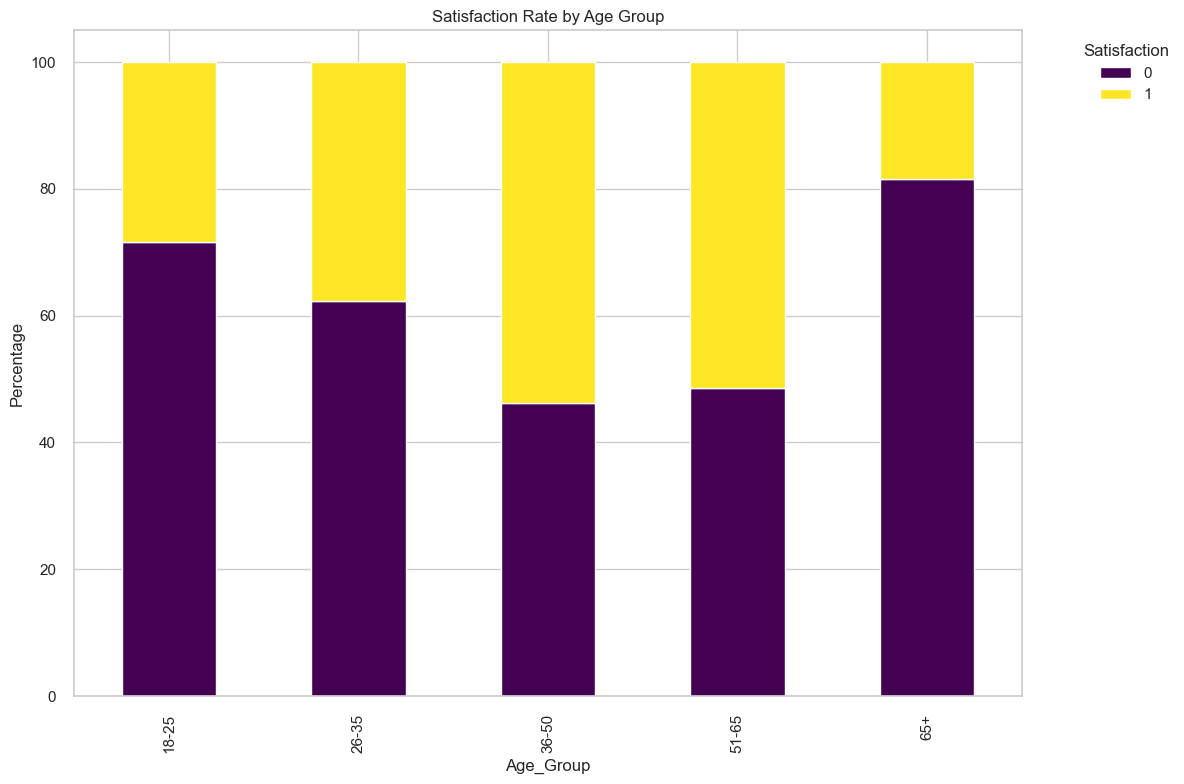

In [76]:
# Create Age_Group column
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 25, 35, 50, 65, 100],
                         labels=['18-25', '26-35', '36-50', '51-65', '65+'])

# Calculate the satisfaction percentages for each Age_Group
age_satisfaction = df.groupby('Age_Group')['Satisfaction'].value_counts(normalize=True) * 100

# Convert the result to a DataFrame suitable for plotting (unstack the Satisfaction level)
age_satisfaction_df = age_satisfaction.unstack().fillna(0)

# Plot a stacked bar chart
plt.figure(figsize=(10, 7))
age_satisfaction_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Percentage')
plt.title('Satisfaction Rate by Age Group')
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> Especially, individuals under 20 and over 60 years of age are the least satisfied with their flight experiences. Upon examining the bar chart, we observe that the satisfaction rate is highest among the business class passengers, who are likely to have a higher socioeconomic status and receive enhanced services. To address this, we should focus on promoting and improving the economy class experience, as it appears to have several disadvantages. Additionally, we should pay special attention to the needs of older passengers, ensuring that the gate locations and overall services cater to their requirements, in order to improve their satisfaction levels and overall ratings.

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

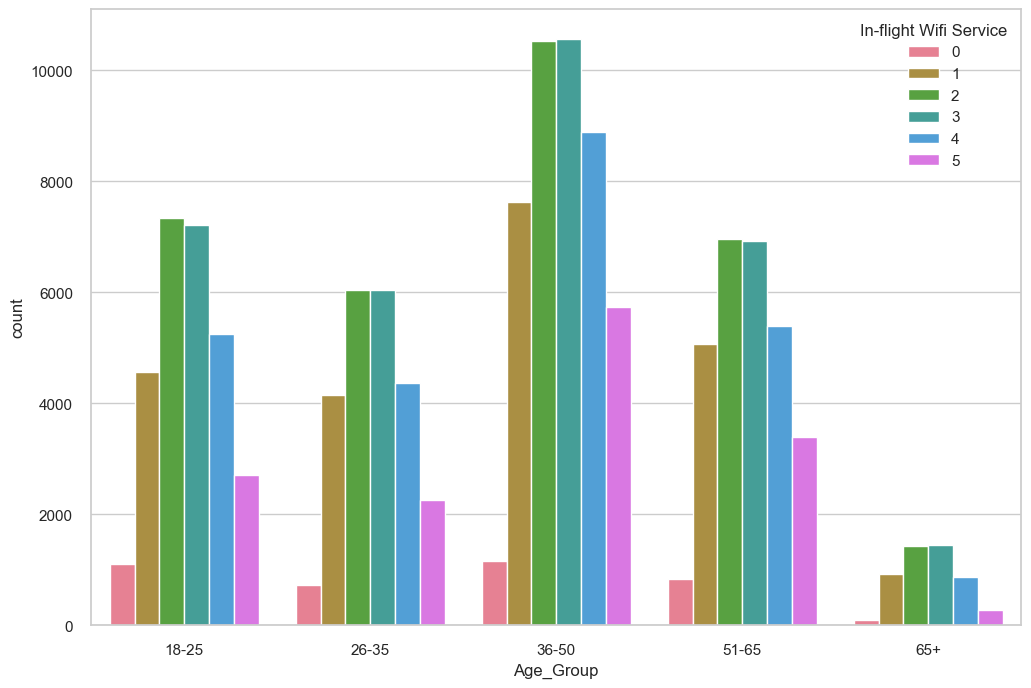

In [77]:
sns.countplot(x ='Age_Group', data= df, hue= 'In-flight Wifi Service')

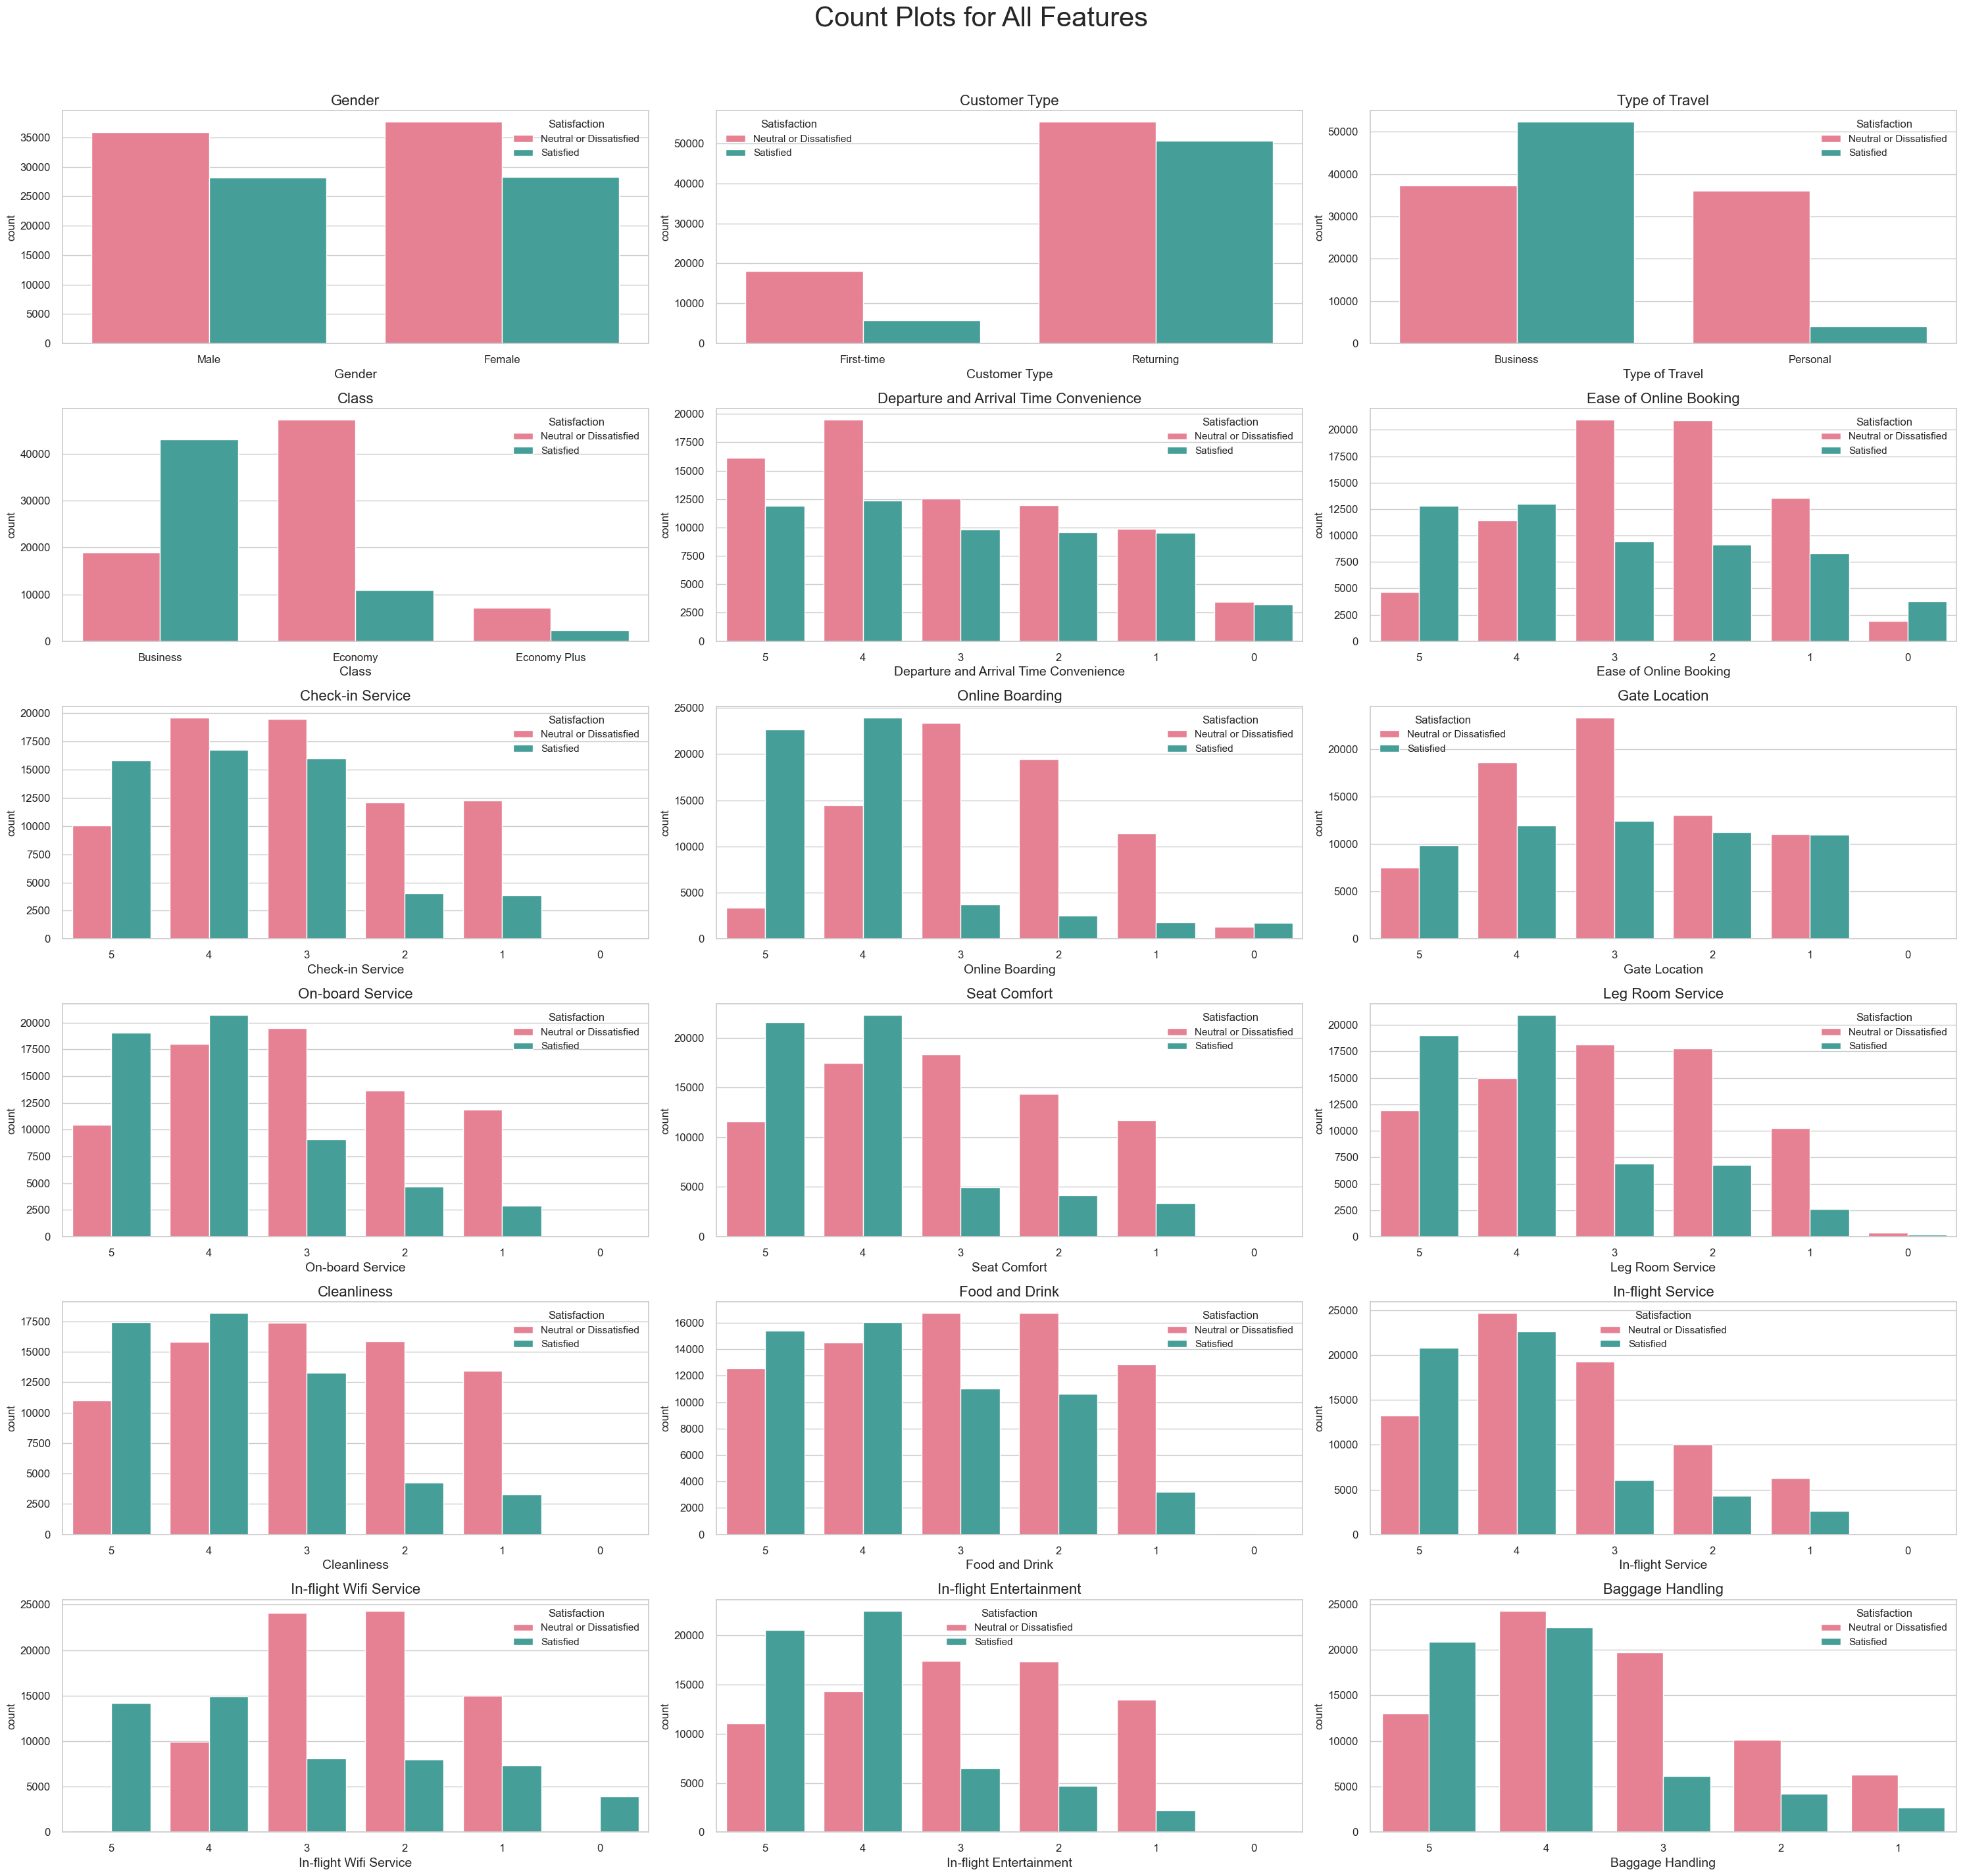

In [46]:
# Dictionary mapping each feature to its ordered values
features_orders = {
    'Gender': ['Male', 'Female'],
    'Customer Type': ['First-time', 'Returning'],
    'Type of Travel': ['Business', 'Personal'],
    'Class': ['Business', 'Economy', 'Economy Plus'],
    'Departure and Arrival Time Convenience': [5 ,4 ,3, 2, 1, 0],
    'Ease of Online Booking': [5 ,4 ,3, 2, 1, 0],
    'Check-in Service': [5 ,4 ,3, 2, 1, 0],
    'Online Boarding': [5 ,4 ,3, 2, 1, 0],
    'Gate Location': [5 ,4 ,3, 2, 1, 0],
    'On-board Service': [5 ,4 ,3, 2, 1, 0],
    'Seat Comfort': [5, 4, 3, 2, 1, 0],
    'Leg Room Service': [5 ,4 ,3, 2, 1, 0],
    'Cleanliness': [5 ,4 ,3, 2, 1, 0],
    'Food and Drink': [5 ,4 ,3, 2, 1, 0],
    'In-flight Service': [5 ,4 ,3, 2, 1, 0],
    'In-flight Wifi Service': [5 ,4 ,3, 2, 1, 0],
    'In-flight Entertainment': [5 ,4 ,3, 2, 1, 0],
    'Baggage Handling': [5 ,4 ,3, 2, 1]
}

# Create a 6x3 grid of subplots
fig, axes = plt.subplots(6, 3, figsize=(30, 30))
fig.suptitle('Count Plots for All Features', fontsize=30, y=0.95)

# Loop through each feature and its order, and plot the count plot
for i, (feature, order) in enumerate(features_orders.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=df, hue='Satisfaction', order=order, ax=ax, palette="husl")
    ax.set_xlabel(feature, fontsize=14)
    ax.set_title(feature, fontsize=16)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# In case there are any unused subplots, remove them
total_plots = 6 * 3  # 18 subplots
if len(features_orders) < total_plots:
    for j in range(len(features_orders), total_plots):
        row = j // 3
        col = j % 3
        fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


> **We noticed that as the order (rating) increases, the level of satisfaction also increases. We observed this trend across most of our categories.**

-  All the passengers who scored 5 (the highest rating) for In-flight Wifi Service were satisfied with their flight. Interestingly, all the passengers who scored 0 (the lowest rating) for In-flight Wifi Service were also satisfied with their flight. This suggests that there are passengers who are not heavily reliant on in-flight Wi-Fi, and it could also be that the flight distance was not long enough for them to require extensive use of the Wi-Fi. However, we should still consider the quality of the Wi-Fi, as it can directly impact passenger satisfaction, and high-quality Wi-Fi is often associated with business class bookings.

- A similar trend was observed with Online Boarding. Most passengers who scored 5 for Online Boarding were satisfied with their flight. Conversely, most passengers who scored 0 for Online Boarding were also satisfied with their flight.
> **Services got good ratings are:**
- In-flight Service, Baggage Handling, Seat Comfort
> **Services got poor rating:**
- In-flight Wifi Service, Ease of Online Booking, Gate Location

### Key Findings:
- **Key Insights:**
1. **Business Class passengers tend to have higher satisfaction levels compared to Economy Class.**
2. **Passengers traveling for Business purposes report higher satisfaction on average.**
3. **There is a noticeable correlation between inflight service ratings and overall satisfaction.**

### Actionable Recommendations:
- **Recommendations:**
1. **Focus on improving Economy Class services to bridge the satisfaction gap.**
2. **Enhance inflight entertainment and food quality for long-distance flights.**
3. **Provide targeted offers or loyalty benefits to new customers to improve retention.**

### Some questions and Visualizations

#### Q1: What is the Age Distribution with Respect to Categorical Columns?

- In this analysis, we investigate how the distribution of passenger ages varies across different categorical groups such as Gender, Customer Type, Type of Travel, and Class. Boxplots will help us visualize the central tendency and dispersion within each category.

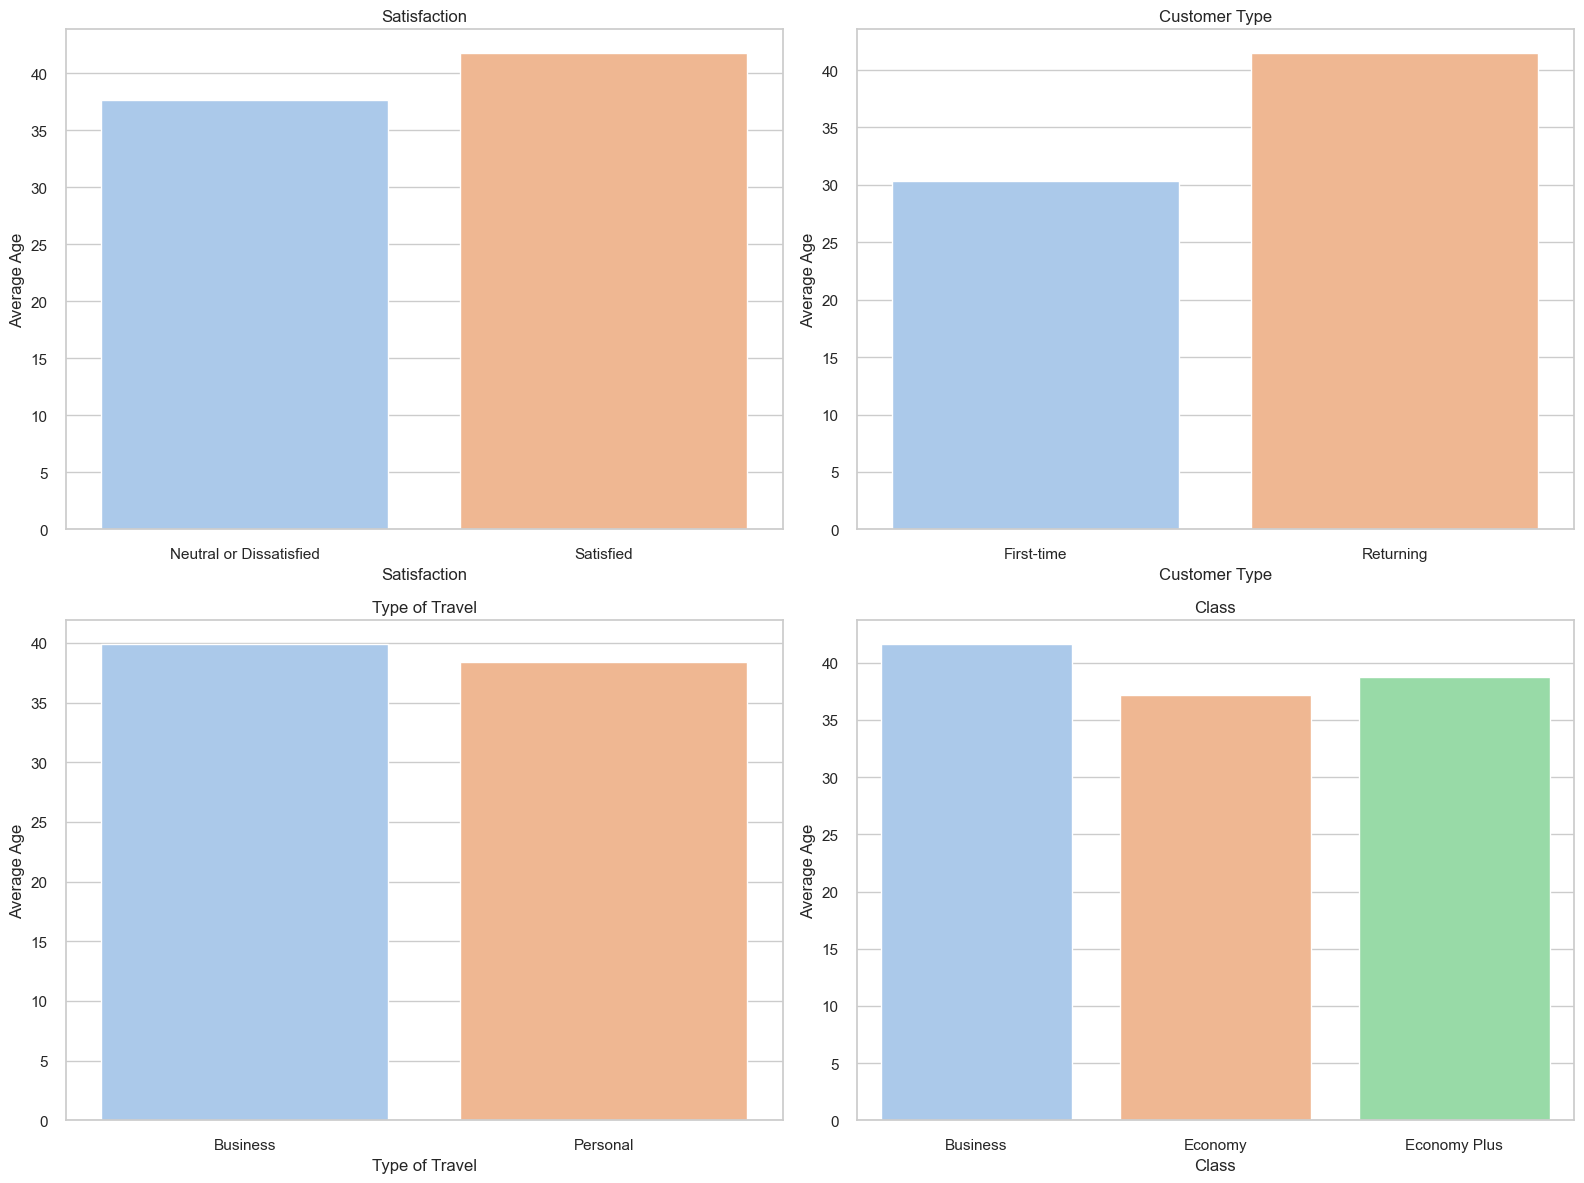

In [105]:
categorical_cols = ["Satisfaction", "Customer Type", "Type of Travel", "Class"]
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    # Compute the average Age for each category
    age_stats = df.groupby(col)["Age"].mean().reset_index()
    sns.barplot(x=col, y="Age", data=age_stats, palette="pastel")
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Average Age")
plt.tight_layout()
plt.show()

> **Age of passengers is Equally distributed in the data**
 
> Passengers of older ages:
- Returning
- Business Class
- Satisfied
 
> Younger passengers:
- First time
- Economy Class
- Dissatisfied

#### Q2: How is Flight Distance Distributed Across Different Categorical Columns?
This analysis examines the distribution of Flight Distance among various categorical segments (e.g., Gender, Customer Type, Type of Travel, and Class). Boxplots are used to visualize differences in flight distances across these groups.

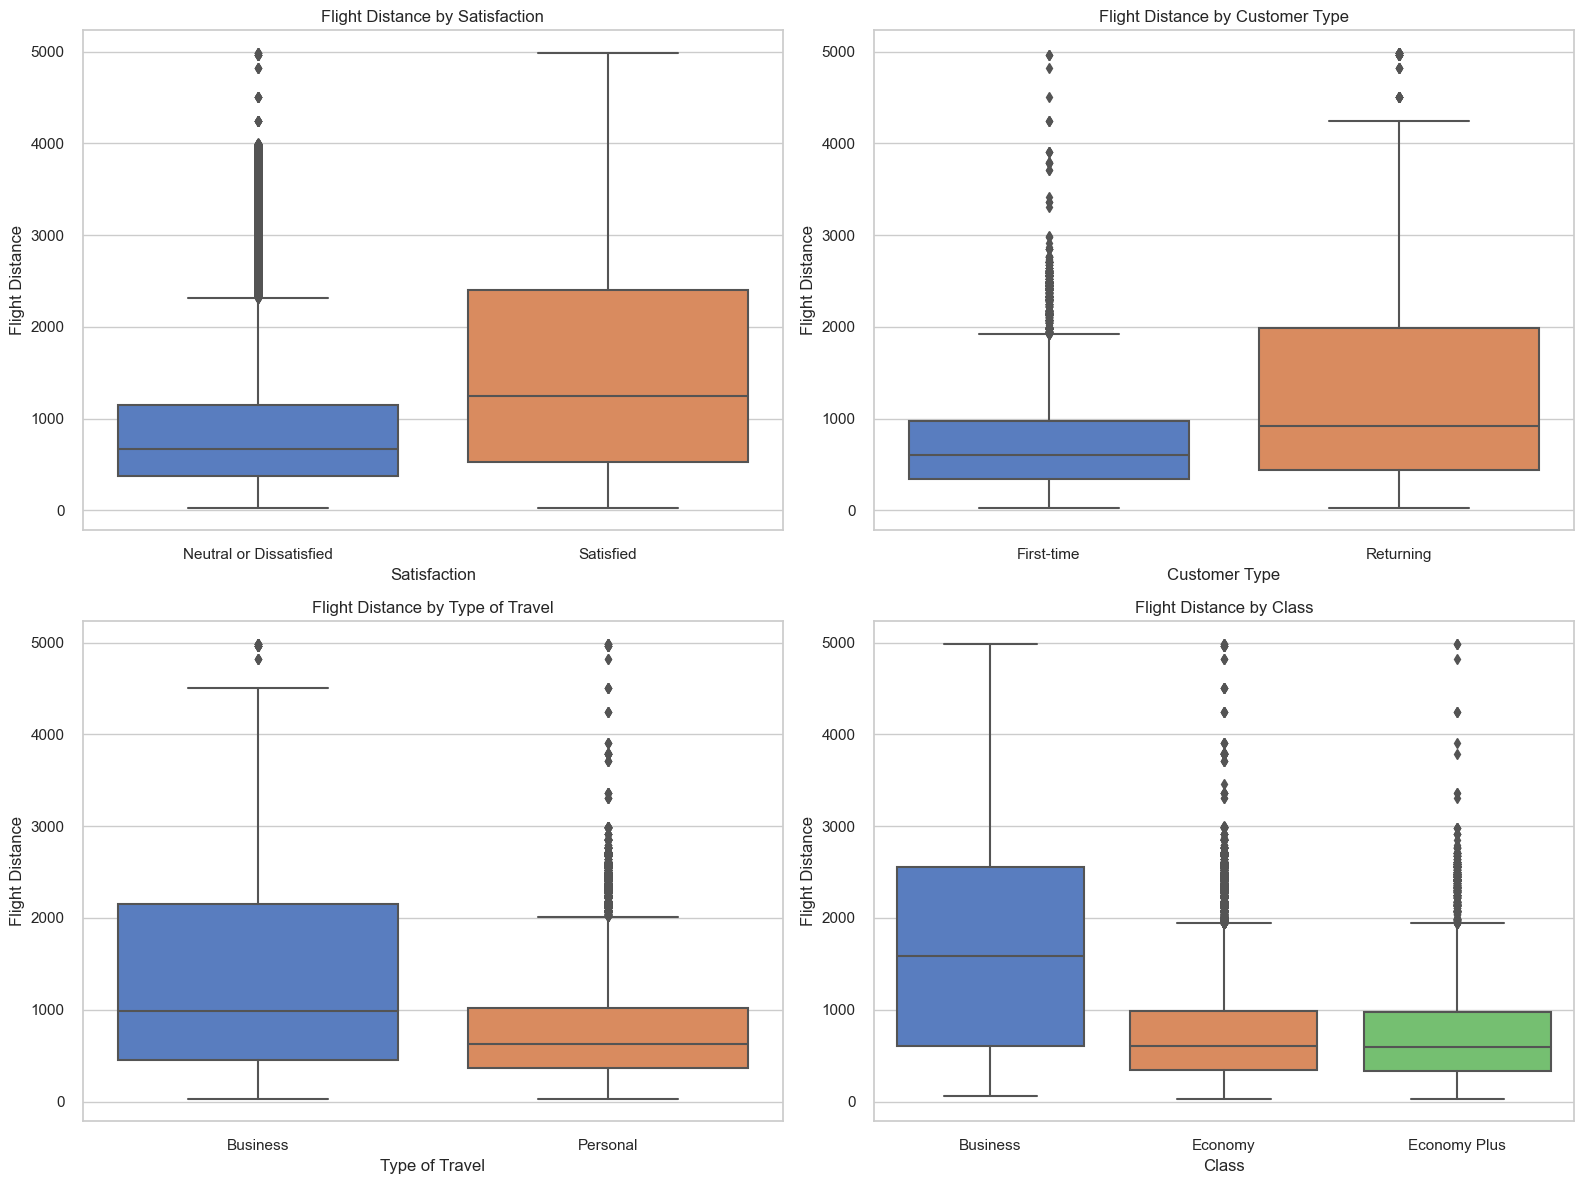

In [106]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y="Flight Distance", data=df, palette="muted")
    plt.title(f"Flight Distance by {col}")
    plt.xlabel(col)
    plt.ylabel("Flight Distance")
plt.tight_layout()
plt.show()

> **Traveling long Distance:**
- Returning Customers
- Business type of travel
- Business Class
- Satisfied Passengers

#### Q3: How does Travel Class affect Inflight Entertainment Ratings?

This analysis examines the relationship between travel class and inflight entertainment ratings. Differences may reveal expectations and satisfaction differences among classes.

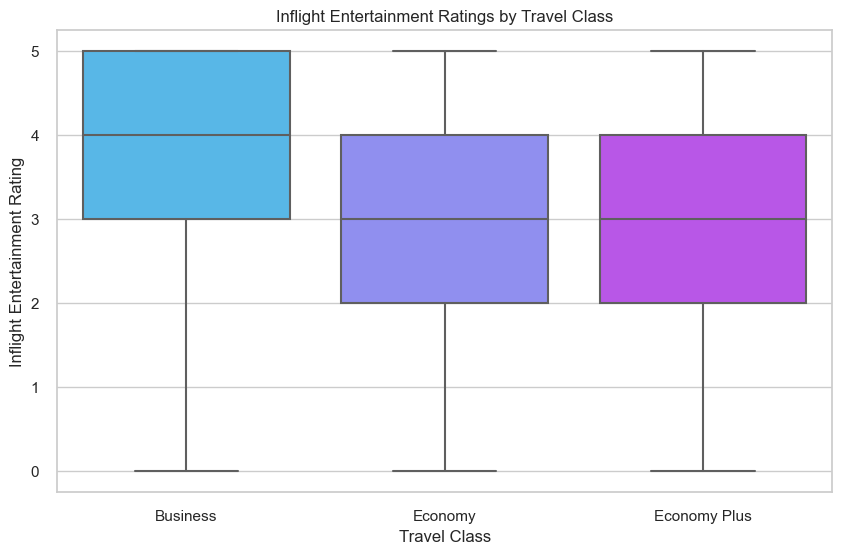

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='In-flight Entertainment', palette='cool')
plt.title("Inflight Entertainment Ratings by Travel Class")
plt.xlabel("Travel Class")
plt.ylabel("Inflight Entertainment Rating")
plt.show()

### Q4:3) How satisfied is the customer with categorical columns?

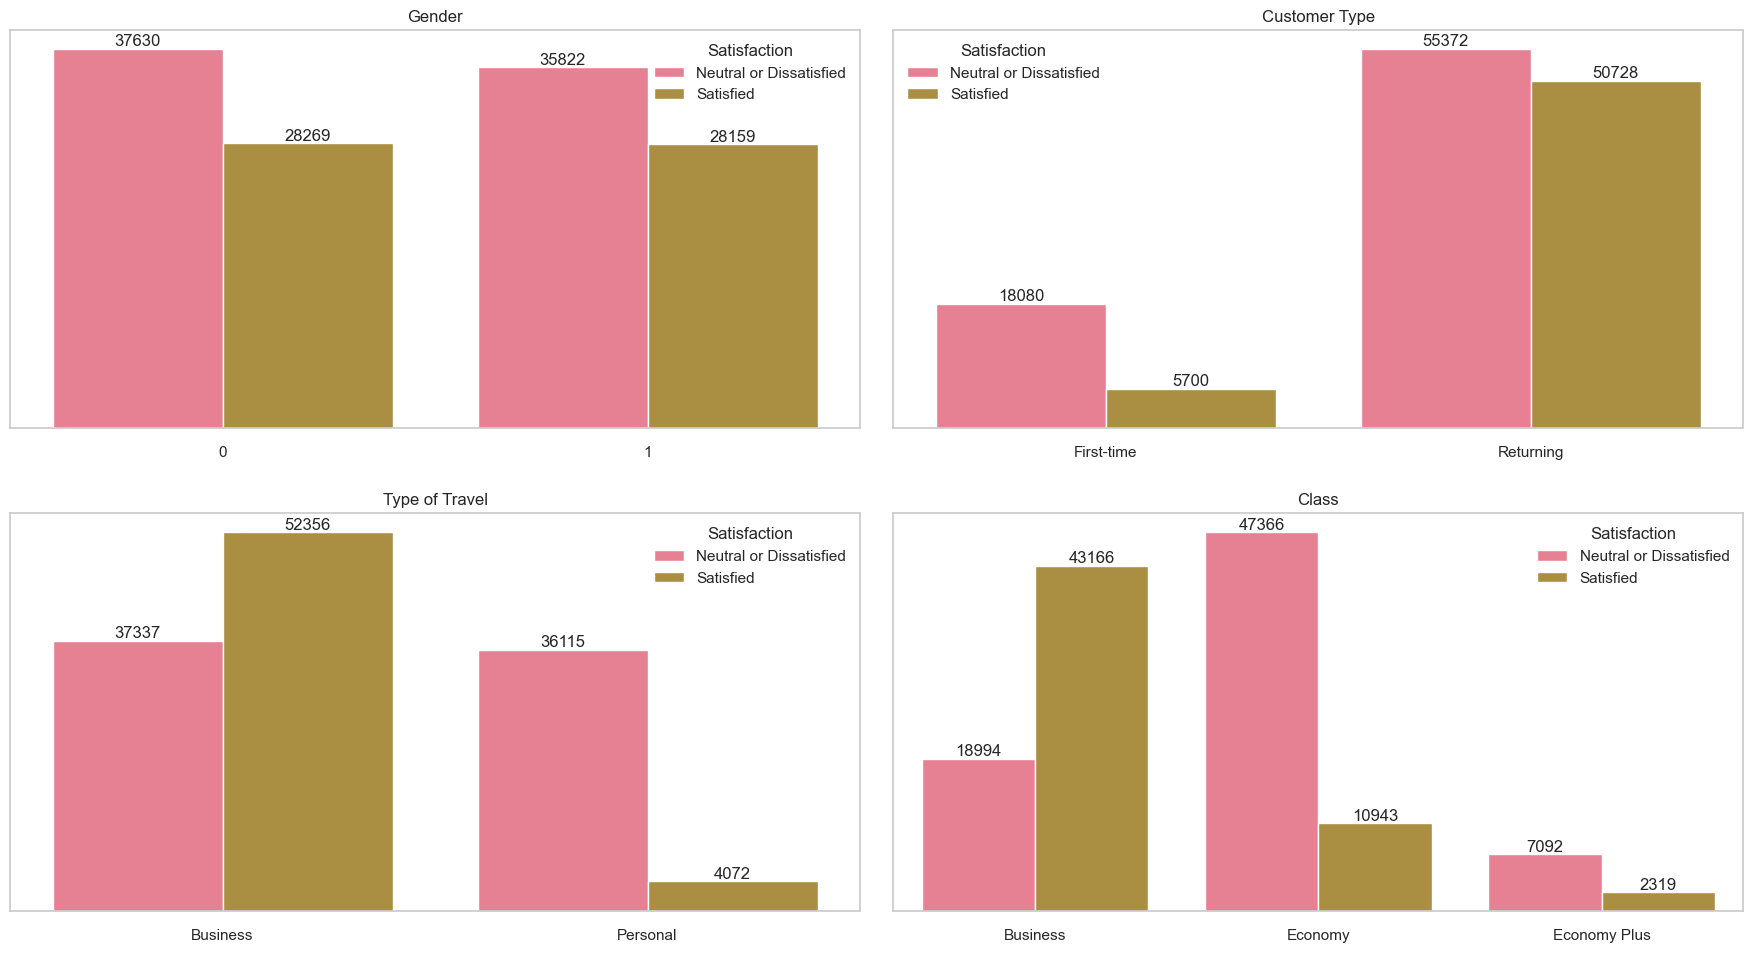

In [127]:
# 1- set figure size
plt.figure(figsize=(18, 10))
categorical_col = ["Gender", "Customer Type", "Type of Travel", "Class"]

# 2- loop over the full categorical column list to plot columns
for index, col in enumerate(categorical_col):
    plt.subplot((len(categorical_col) + 1) // 2, 2, index + 1)  # create sub-plot
    graph = sns.countplot(x=col, data=df, hue="Satisfaction")
    
    for container in graph.containers:  # Show numbers above each graph
        graph.bar_label(container)
       
    plt.title(col)       # set title to each plot
    plt.xlabel("")       # replace x label with empty string
    plt.ylabel("")       # replace y label with empty string
    plt.yticks([])       # Remove y-axis ticks

# 3- set layout between plots
plt.tight_layout(pad=2)
plt.show()



- **Gender is almost equal for men and women, whether they are satisfied or not.**
 
- **Returning Customer type is almost Equally, but First time Customers not satified at all.**
 
- **Business Type of Travel is More Satisfied, but Personal type which mostly not satisfied.**
 
- **Business Class is More Satisfied, but Economy & Eco Plus Class which mostly not satisfied.**

### Encoding Categorial Features

In [47]:
unique_values = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

Gender : ['Male', 'Female']
Customer Type : ['First-time', 'Returning']
Type of Travel : ['Business', 'Personal']
Class : ['Business', 'Economy', 'Economy Plus']
Departure and Arrival Time Convenience : [3, 2, 4, 1, 5, 0]
Ease of Online Booking : [3, 2, 4, 1, 5, 0]
Check-in Service : [4, 3, 1, 2, 5, 0]
Online Boarding : [3, 5, 4, 2, 1, 0]
Gate Location : [3, 2, 4, 1, 5, 0]
On-board Service : [3, 5, 4, 2, 1, 0]
Seat Comfort : [5, 4, 3, 2, 1, 0]
Leg Room Service : [2, 5, 3, 4, 1, 0]
Cleanliness : [5, 4, 3, 2, 1, 0]
Food and Drink : [5, 3, 4, 2, 1, 0]
In-flight Service : [5, 3, 4, 1, 2, 0]
In-flight Wifi Service : [3, 2, 4, 1, 0, 5]
In-flight Entertainment : [5, 3, 4, 2, 1, 0]
Baggage Handling : [5, 3, 4, 1, 2]
Satisfaction : ['Neutral or Dissatisfied', 'Satisfied']


In [48]:
#handling ordinal categorial variables
class_encod = ['Business', 'Economy', 'Economy Plus']                
df['Class'] = df['Class'].apply(lambda x: class_encod.index(x))

In [49]:
pare=["Ease of Online Booking","Check-in Service" ,"Online Boarding","Gate Location" ,"Leg Room Service","Cleanliness","Food and Drink" ,"In-flight Service" ,"In-flight Wifi Service" ,"In-flight Entertainment" ,"Baggage Handling","Seat Comfort","On-board Service","Departure and Arrival Time Convenience"]
for i in pare:
    df[i]=df[i].astype(int)

In [50]:
binary_columns = ['Gender', 'Customer Type', 'Satisfaction', 'Type of Travel']                  
le = LabelEncoder()
for column in binary_columns:
    df[column] = le.fit_transform(df[column])

In [51]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age_Group
0,1,48,0,0,0,821,2,5.0,3,3,...,5,2,5,5,5,3,5,5,0,36-50
1,0,35,1,0,0,821,26,39.0,2,2,...,4,5,5,3,5,2,5,5,1,26-35
2,1,41,1,0,0,853,0,0.0,4,4,...,5,3,5,5,3,4,3,3,1,36-50
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,4,4,5,2,5,5,1,36-50
4,0,49,1,0,0,3470,0,1.0,3,3,...,4,4,5,4,3,3,3,3,1,36-50


In [52]:
df.drop(["Age_Group"],axis=1,inplace=True)

In [53]:
x = df.drop("Satisfaction", axis = 1)
y = df['Satisfaction']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())

0    58762
1    45142
Name: Satisfaction, dtype: int64


In [55]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

> I am going to apply 4 supervised machine learning models on the given dataset. The strategy is to apply the default model first with no tuning of the hyperparameters, then tune them with different hyperparameter values.

In [56]:
#finding the best models with base parameters
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Classifier', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
   
    
]

results = dict()
for name, model in models:

      model.fit(x_train, y_train)
      pred = model.predict(x_test)
      score = accuracy_score(y_test, pred)
      print(classification_report(y_test, pred))
      from sklearn import metrics 
      from sklearn.metrics import roc_curve, auc

      auc_roc=metrics.roc_auc_score(y_test,pred)
      print(auc_roc)


     
      mae = mean_absolute_error(y_test, pred)
      mse = mean_squared_error(y_test, pred)
      rmse = np.sqrt(mean_squared_error(y_test, pred))
      precision = precision_score(y_test, pred) 
      results[name] = score 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14690
           1       0.87      0.84      0.86     11286

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.88     25976
weighted avg       0.88      0.88      0.88     25976

0.8743682510799419
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14690
           1       0.96      0.94      0.95     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

0.9577155356847952
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     14690
           1       0.94      0.94      0.94     11286

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95   

In [57]:
#storing the results into dataframe
df_results = pd.DataFrame([results])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Score'}).sort_values(by='Score',ascending=False)

In [58]:
df_results.columns

Index(['Score'], dtype='object')

In [61]:
df_results.style

,Score
Random Forest Classifier,0.966739
Support Vector Classifier,0.959501
Decision Tree,0.949569
Logistic Regression,0.878503


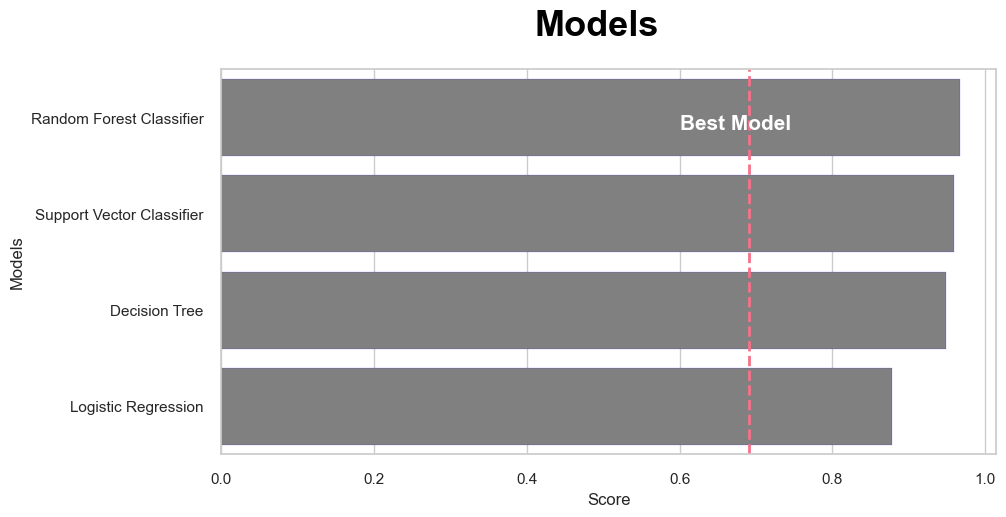

In [73]:
fig = plt.figure(figsize=(10,5))

ax = sns.barplot(data=df_results, 
                 y=df_results.index, 
                 x='Score',
                 color='gray',
                 saturation=0.8,
                 edgecolor='blue',
                 linewidth=0.1)

ax.figure.suptitle('Models',y=1.00, size = 26, color = 'black', weight='bold');
ax.text(x = 0.6, y = 0.12, s = 'Best Model', fontsize=15, weight = 'bold',color='w')


plt.xlabel('Score')
plt.ylabel('Models')
plt.axvline(x = 0.691, ymin = 0, ymax = 1, linewidth = 2, linestyle ="--");

> **So here we have a little difference between the first and the second model but Random Forest Classifier is a best.**

### **Thank you for your support in finalizing the Notebook and for your comments that help me improve.☺️**